In [2]:
from owslib.wfs import WebFeatureService

In [3]:
wfs11 = WebFeatureService(url='https://www.imis.bfs.de/ogc/opendata/ows', version='1.1.0')
wfs11.identification.title

'BfS Download'

In [4]:
[operation.name for operation in wfs11.operations]

['GetCapabilities',
 'DescribeFeatureType',
 'GetFeature',
 'GetGmlObject',
 'LockFeature',
 'GetFeatureWithLock',
 'Transaction']

In [5]:
list(wfs11.contents)

['opendata:abi_30min',
 'opendata:abi_30min_barchart',
 'opendata:abi_30min_barchart_store',
 'opendata:abi_30min_timeseries',
 'opendata:bfg_gesamt_gamma',
 'opendata:bfg_sondenstandorte',
 'opendata:bfs_locations',
 'opendata:bsh_gesamt_gamma_kuenstlich',
 'opendata:bsh_gesamt_gamma_kuenstlich_timeseries',
 'opendata:bsh_sondenstandorte',
 'opendata:eurdep_latestValue',
 'opendata:eurdep_maxValue',
 'opendata:bfg_gesamt_gamma_timeseries',
 'opendata:new_dwd_alphabeta_kuenstl_24h',
 'opendata:new_dwd_alphabeta_kuenstl_24h_timeseries',
 'opendata:new_dwd_gamma_aerosole_24h_nuclide',
 'opendata:new_dwd_iod_24h',
 'opendata:new_dwd_iod_24h_timeseries',
 'opendata:new_dwd_niederschlag_24h',
 'opendata:new_dwd_niederschlag_24h_timeseries',
 'opendata:new_dwd_niederschlag_ges_beta_24h_verz',
 'opendata:new_dwd_niederschlag_ges_beta_24h_verz_timeseries',
 'opendata:new_gamma_aerosole_24h',
 'opendata:new_gamma_aerosole_24h_timeseries',
 'opendata:new_nuklide_bodenoberflaeche',
 'opendata:nuk

In [124]:
wfs11.get_schema('opendata:odl_brutto_1h')

{'properties': {'id': 'string',
  'locality_name': 'string',
  'start': 'dateTime',
  'end_measure': 'dateTime',
  'unit': 'string',
  'value_e': 'string',
  'value': 'decimal',
  'nuclide': 'string',
  'duration': 'string',
  'dom': 'string',
  'source': 'string',
  'network_id': 'string'},
 'required': ['id', 'locality_name', 'end_measure', 'network_id'],
 'geometry': 'Point',
 'geometry_column': 'geom'}

In [11]:
import xml.dom.minidom # WFS returns GML - this library is used to parse it

response = wfs11.getfeature(typename='opendata:nuklide_fleisch', bbox=(0.0004322,0.0000835,0.0004397,0.0001045), srsname='EPSG:4326')
xml = xml.dom.minidom.parse(response) # or xml.dom.minidom.parseString(xml_string)
print(xml.toprettyxml(indent="    "))

<?xml version="1.0" ?>
<wfs:FeatureCollection xmlns:xs="http://www.w3.org/2001/XMLSchema" xmlns:wfs="http://www.opengis.net/wfs" xmlns:opendata="www.imis.bfs.de/opendata" xmlns:gml="http://www.opengis.net/gml" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" numberOfFeatures="36" timeStamp="2022-07-20T15:39:01.215Z" xsi:schemaLocation="www.imis.bfs.de/opendata https://www.imis.bfs.de/ogc/opendata/wfs?service=WFS&amp;version=1.1.0&amp;request=DescribeFeatureType&amp;typeName=opendata%3Anuklide_fleisch http://www.opengis.net/wfs https://www.imis.bfs.de/ogc/schemas/wfs/1.1.0/wfs.xsd">
    <gml:featureMembers>
        <opendata:nuklide_fleisch gml:id="nuklide_fleisch.fid--3ee2bc79_1821c42c833_3bba">
            <opendata:id>ZDB000000158284Y</opendata:id>
            <opendata:sample_begin>2021-07-19T08:00:00Z</opendata:sample_begin>
            <opendata:id_long>2021-07-19 08:00:00 (Probe: ZDB000000158284Y)</opendata:id_long>
            <opendata:sample_type>N54</opendata:sample_type

In [8]:
import networkx  as nx
response = wfs11.getfeature(typename='opendata:nuklide_fleisch', bbox=(0.0004322,0.0000835,0.0004397,0.0001045), srsname='EPSG:4326')
d= nx.parse_gml(response)
H = nx.read_gml(d)
H.node

NetworkXError: input is not ASCII-encoded

In [10]:
import json
import codecs, io
response = wfs11.getfeature(typename='opendata:nuklide_fleisch', bbox=(0.0004322,0.0000835,0.0004397,0.0001045), srsname='EPSG:4326', outputFormat='application%2Fjson')
text_obj = response.decode('UTF-8')
text_st = io.StringIO(text_obj)
print(text_st)

AttributeError: '_io.BytesIO' object has no attribute 'decode'

In [ ]:
import requests
import json
url = 'https://www.imis.bfs.de/ogc/opendata/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=opendata:nuklide_fisch&outputFormat=application%2Fjson'
resp = requests.get(url)
data = json.loads(resp.text)
print(data)

In [4]:

import json # WFS returns GML - this library is used to parse it

response = wfs11.getfeature(typename='opendata:nuklide_fleisch', bbox=(0.0004338,0.0000672,0.0004778,0.0001123), srsname='EPSG:4326', outputFormat='application%2Fjson')
# convert IO-byte to bytes
bytesD=bytes(response.read())
# convert to json
data = json.loads(bytesD)
print(data)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2716', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[0.08983153, 0], [0.08810544, -0.01752526], [0.08299351, -0.03437704], [0.07469219, -0.04990772], [0.06352048, -0.06352047], [0.04990772, -0.07469216], [0.03437704, -0.08299348], [0.01752526, -0.08810541], [0, -0.08983149], [-0.01752526, -0.08810541], [-0.03437704, -0.08299348], [-0.04990772, -0.07469216], [-0.06352048, -0.06352047], [-0.07469219, -0.04990772], [-0.08299351, -0.03437704], [-0.08810544, -0.01752526], [-0.08983153, 0], [-0.08810544, 0.01752526], [-0.08299351, 0.03437704], [-0.07469219, 0.04990772], [-0.06352048, 0.06352047], [-0.04990772, 0.07469216], [-0.03437704, 0.08299348], [-0.01752526, 0.08810541], [0, 0.08983149], [0.01752526, 0.08810541], [0.03437704, 0.08299348], [0.04990772, 0.07469216], [0.06352048, 0.06352047], [0.07469219, 0.04990772], [0.08299351, 0.03437704], [0.08810544, 0.01752526],

       type                                               id geometry_name  \
0   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2716          geom   
1   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2715          geom   
2   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2714          geom   
3   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2713          geom   
4   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2712          geom   
5   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2711          geom   
6   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-2710          geom   
7   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-270f          geom   
8   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-270e          geom   
9   Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-270d          geom   
10  Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-270c          geom   
11  Feature  nuklide_fleisch.fid--3ee2bc79_1821c369d5c_-270b    

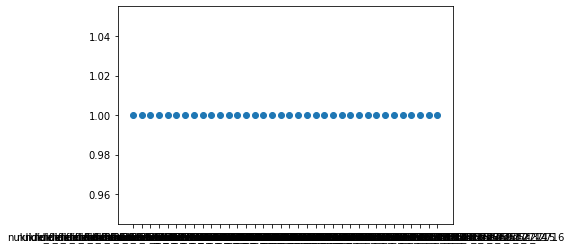

<AxesSubplot:xlabel='id'>

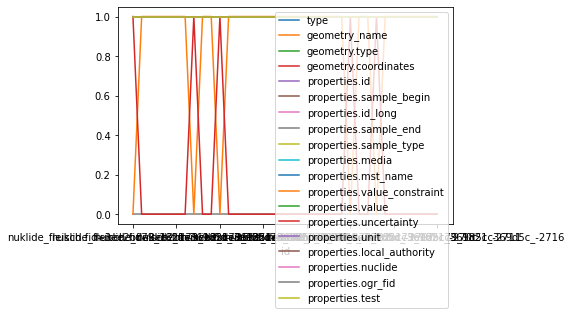

In [7]:

import pandas as pd
from matplotlib import pyplot as plt
import requests
import json



#df = pd.DataFrame(data=data)
#print(df)

# using pandas for serializing
df= pd.json_normalize(data,"features")
print(df)

dfg = df.groupby('id').count()
# using matplotlib scatter chart
plt.scatter(x=dfg.index, y=dfg['type'])
plt.show()

# using pandas plot
dfg.plot()

In [7]:
from owslib.fes import *
from owslib.etree import etree

filter = PropertyIsLike(nuclide='nuclide', literal='Ingolstadt', wildCard='*')
filterxml = etree.tostring(filter.toXML()).decode("utf-8")
response = wfs11.getfeature(typename='bvv:gmd_ex', filter=filterxml)

TypeError: PropertyIsLike.__init__() got an unexpected keyword argument 'nuclide'

In [8]:
from owslib.fes import *
from owslib.etree import etree


#filter = PropertyIsLike(propertyname='locality_name', literal='Lögow', wildCard='*')
#filter = PropertyIsLike(propertyname='nuclide', literal='Gamma-ODL-Brutto', wildCard='*')
filter = PropertyIsEqualTo(propertyname='value', literal='0.074', matchcase=True)
#filter = PropertyIsGreaterThanOrEqualTo(propertyname='end_measure', literal='2022-07-13 15:43:12.948085', matchcase=True)
filterxml = etree.tostring(filter.toXML()).decode("utf-8")


response = wfs11.getfeature(
    typename= 'opendata:odl_brutto_1h', 
    filter= filterxml,

)

out = open('/tmp/data.gml', 'wb')
out.write(bytes(response.read(), 'UTF-8'))
out.close()

KeyboardInterrupt: 